In [58]:
import sqlite3

conn = sqlite3.connect('raam_database.db')
cursor = conn.cursor()

a = " SELECT name FROM sqlite_master WHERE type='table' "
cursor.execute(a).fetchall()

[('health_anxiety_table_raw',),
 ('health_anxiety_posts',),
 ('sqlite_sequence',),
 ('health_anxiety_comments',),
 ('nursing_table_raw',),
 ('nursing_posts',),
 ('nursing_comments',),
 ('teaching_table_raw',),
 ('teaching_posts',),
 ('teaching_comments',)]

In [60]:
import sqlite3
conn = sqlite3.connect('raam_database.db')
cursor = conn.cursor()

a = """ select count(*) FROM nursing_comments"""
b = """ select count(*) FROM nursing_posts"""

cursor.execute(a).fetchall() # 8,850 -- 9,805 -- 1,961
#cursor.execute(b).fetchall() # 104 -- 118 -- 59

[(1961,)]

In [62]:
import sqlite3
conn = sqlite3.connect('raam_database.db')
cursor = conn.cursor()

a = """ select count(*) FROM teaching_comments"""
b = """ select count(*) FROM teaching_posts"""

cursor.execute(a).fetchall() # 2,619 -- 12,925 -- 2,585
#cursor.execute(b).fetchall() # 59 -- 120 -- 60

[(2585,)]

In [64]:
import sqlite3
conn = sqlite3.connect('raam_database.db')
cursor = conn.cursor()

a = """ select distinct count(*) FROM health_anxiety_comments"""
b = """ select distinct count(*) FROM health_anxiety_posts"""

cursor.execute(a).fetchall() # 11,655 -- 22,130 -- 4,426
cursor.execute(b).fetchall() # 198 -- 316 -- 158

[(158,)]

In [43]:
conn.close()

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # matplolib pyplot module as "plt"
import seaborn as sns             # seaborn as "sns"
import sqlite3

In [66]:
conn = sqlite3.connect('raam_database.db')
cur = conn.cursor()

In [67]:
a = """SELECT post_id, 
count(comment_id) as num_comments 
FROM teaching_comments
group by post_id"""
cur.execute(a).fetchall()
df = pd.read_sql_query(a, conn)

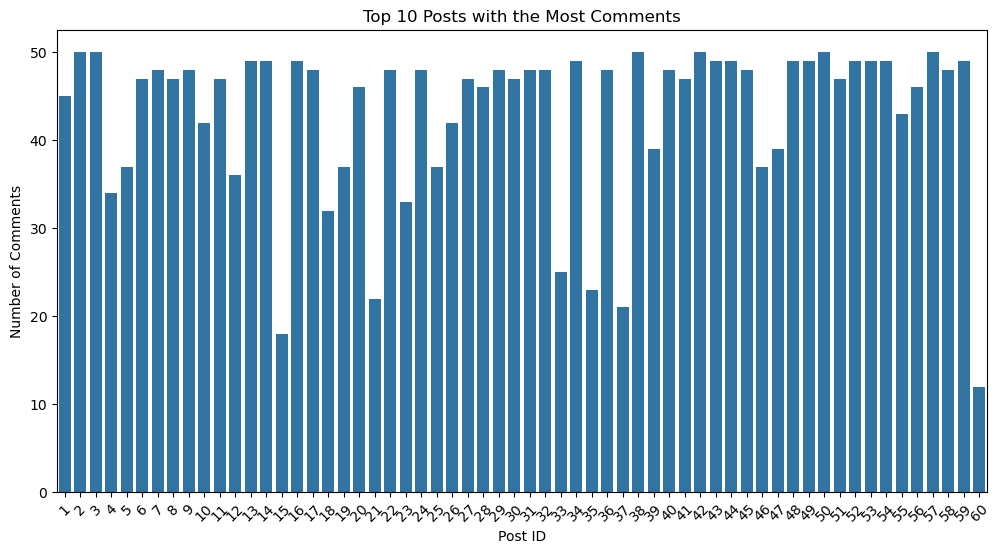

In [69]:
# Sort and select the top 10 most commented posts
top_posts = df.sort_values(by='num_comments', ascending=False).head(100)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_posts['post_id'], y=top_posts['num_comments'])
plt.xlabel('Post ID')
plt.ylabel('Number of Comments')
plt.title('Top 10 Posts with the Most Comments')
plt.xticks(rotation=45)
plt.show()

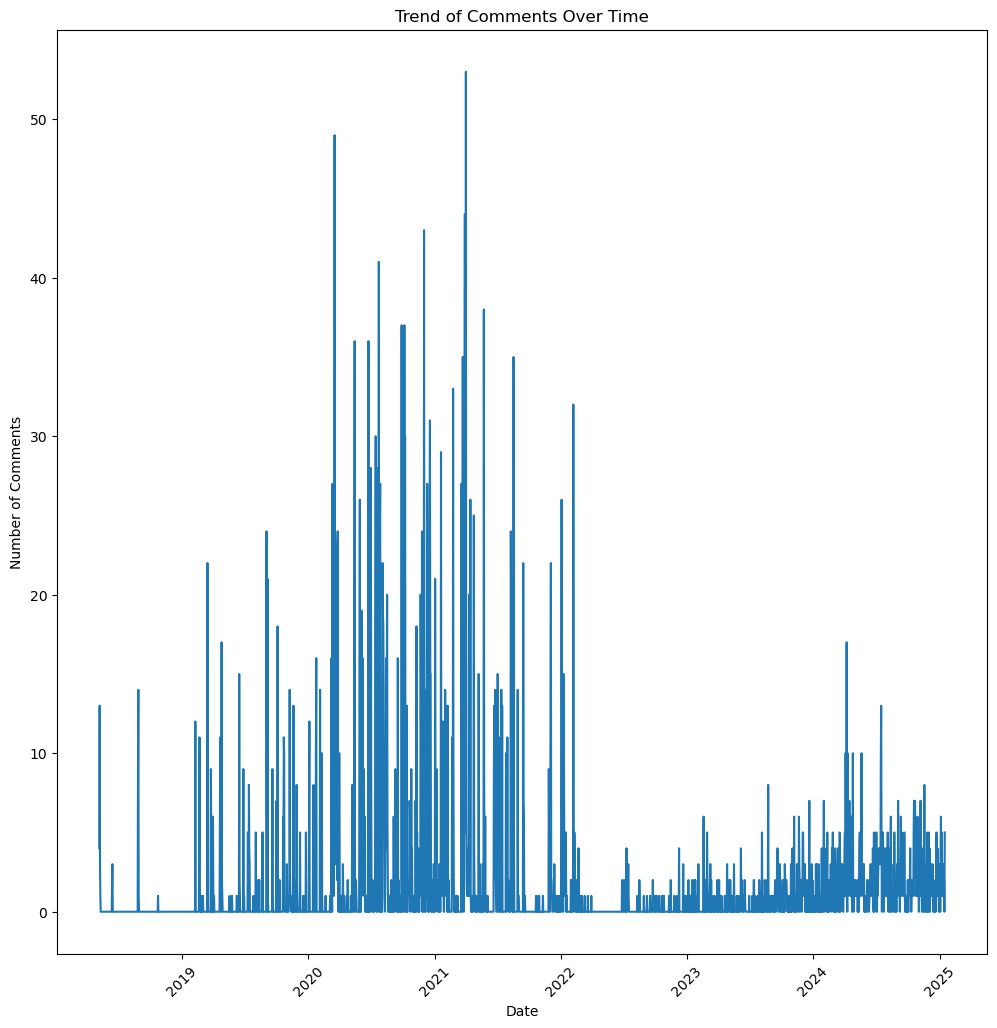

In [70]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM health_anxiety_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()

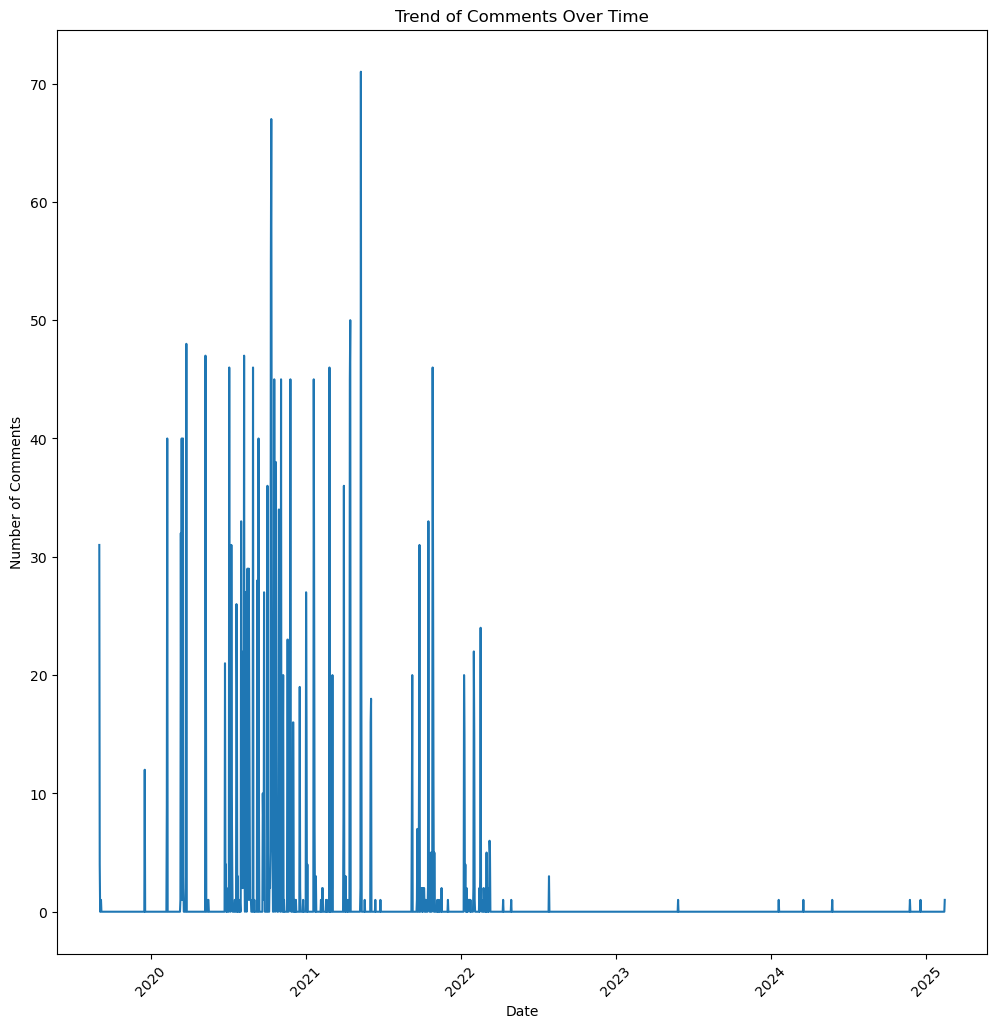

In [71]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM teaching_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()

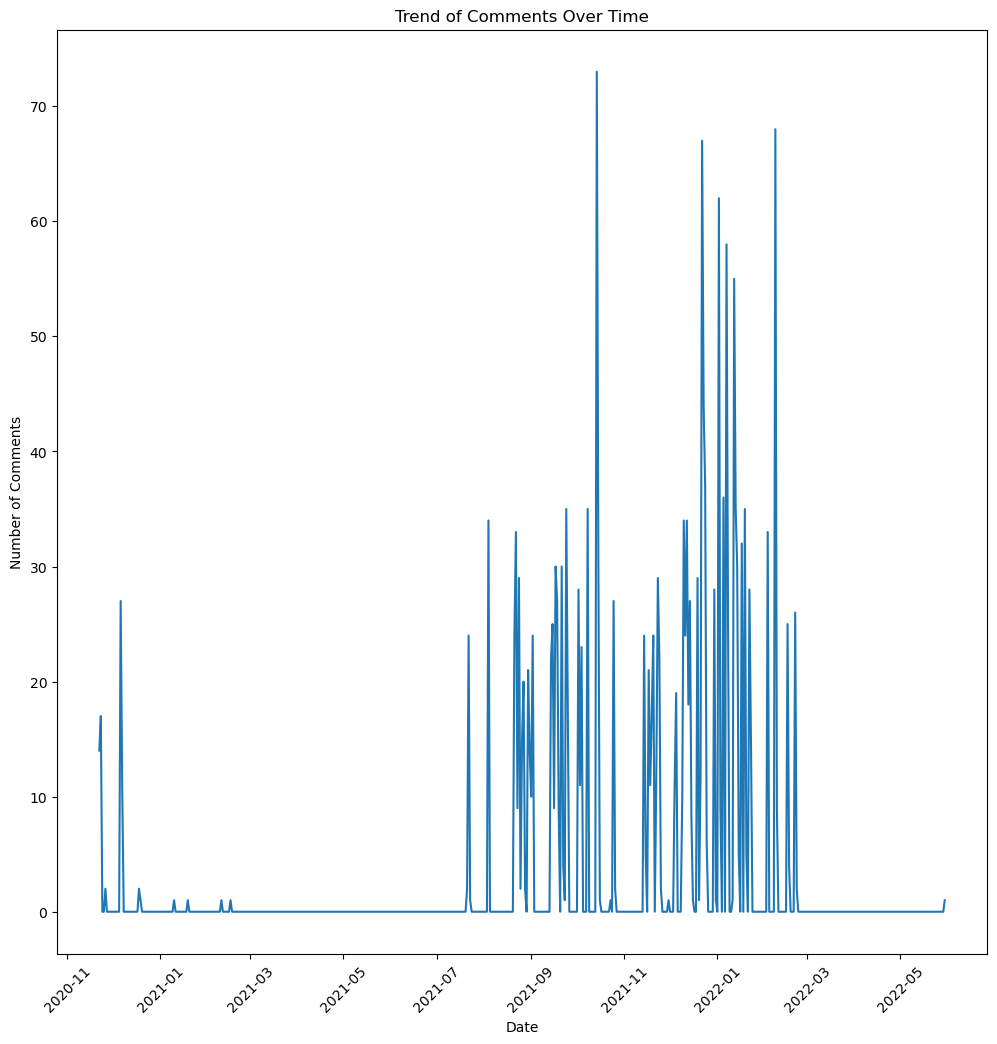

In [72]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM nursing_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()